# 201804224 데이터사이언스전공 이다솜

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [223]:
telco = pd.read_csv('telco.csv')
telco

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


칼럼 설명

- Leave	가입해지여부(1이면 해지)
- MemberWeeks	가입기간
- NewContract	가입갱신여부(1이면 갱신)
- IsData	데이터요금제사용여부(1이면 사용)
- DataAmount	데이터사용량(GB)
- Callcenter	고객센터전화량
- CalMins	월평균전화량(분)
- CalCounts	월평균전화수(횟수)
- MonthlyFee	월평균요금
- OverFee	초과요금
- RoamingMin	로밍시간(분)

# 1. 탐색적 데이터 분석 (EDA)

In [224]:
# 타입 확인
type(telco)

pandas.core.frame.DataFrame

In [225]:
# 결측치 확인
telco.isnull().any().any() # 아무 결측치도 존재 하지 않음

False

In [226]:
# 전체적 데이터 확인
telco.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [227]:
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


# 2. 정규분포 확인 및 검정하기

<AxesSubplot:xlabel='MemberWeeks', ylabel='Density'>

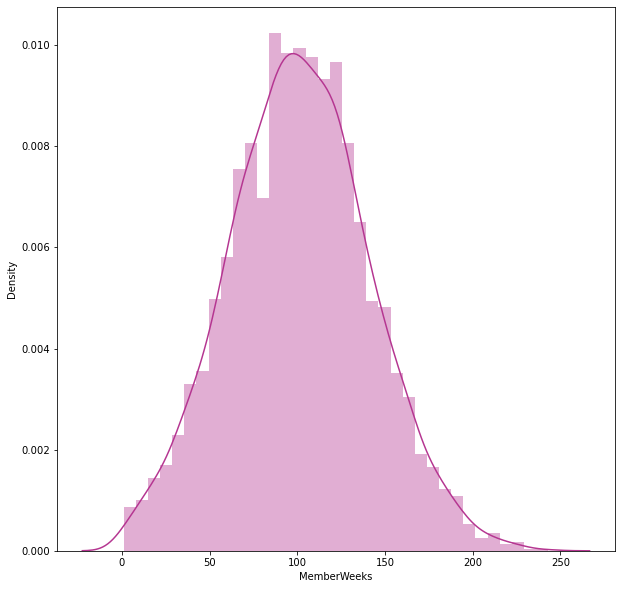

In [228]:
sns.distplot(telco['MemberWeeks'], color='#B53691')

가입 기간 칼럼이 이렇듯 정규분포 형태로 그려지는 것을 확인하였습니다.

그렇다면 그래프가 아닌 kstest 모듈로 실제로 정규분포를 완벽히 따르는지 검정을 해보겠습니다.

In [229]:
from scipy import stats
stats.kstest(telco.MemberWeeks, cdf='norm')

KstestResult(statistic=0.9959498319413672, pvalue=0.0)

p 값이 0.5 이하인 것을 보아하니 그림으로 그려볼 필요가 있겠습니다.

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  1,   1,   1, ..., 225, 232, 243], dtype=int64)),
 (39.824255693804446, 101.06480648064806, 0.9992452975727013))

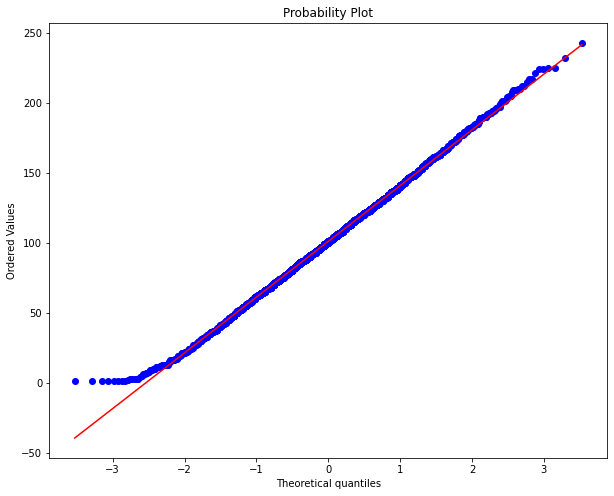

In [230]:
# 그림으로 표현
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(telco.MemberWeeks, plot=ax)

##### 빨간선대로 파란 점이 이동해야 정규분포라고 확인할 수 있습니다.
##### 결과 그래프를 보아하니 양끝 파란 점들이 빨간 선을 빗나가고 있음을 확인하였습니다.
##### 따라서 이 그래프는 완벽한 정규분포는 아니다 라고 결정 내릴 수 있겠습니다.

# 3. 상관관계 확인

In [231]:
# 상관관계 찾기
telco.corr(method='pearson') # 컬럼 별 상관관계

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
Leave,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
MemberWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
NewContract,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
IsData,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataAmount,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
Callcenter,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
CalMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
CalCounts,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyFee,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


<AxesSubplot:>

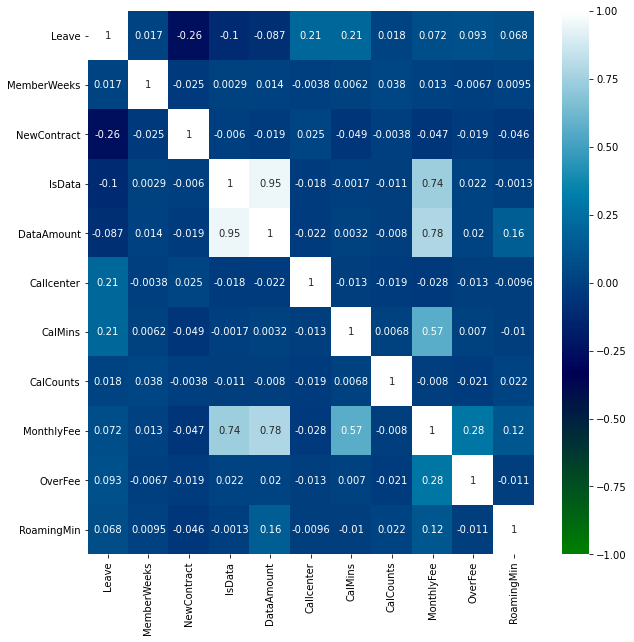

In [232]:
# 상관관계 그림으로 나타내기
plt.rcParams["figure.figsize"] = (10,10) # 크기
sns.heatmap(telco.corr(),
           annot = True, 
           cmap = 'ocean', # 색 지정
           vmin = -1, vmax=1 , # -1~1 까지
          )

양의 상관관계를 가진 두 칼럼
- MonthlyFee - DataAmount : 0.78

그림으로 그려봅니다.

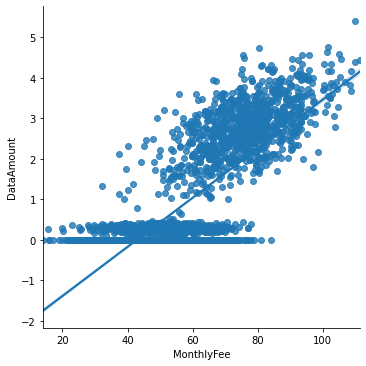

In [233]:
res = sns.lmplot(
     x="MonthlyFee", y='DataAmount', data=telco
)

DataAmount 데이터를 보아하니 양의 상관관계는 맞지만 0 쪽에 크게 몰려있어 산포도가 제대로 그려지지 않은 점을 알 수 있었습니다.

따라서 너무 큰 중복되는 데이터들을 제거 후 다시 비교해보도록 하겠습니다.

# 4. 행 제거 및 수치형 데이터의 범주화

<AxesSubplot:ylabel='Frequency'>

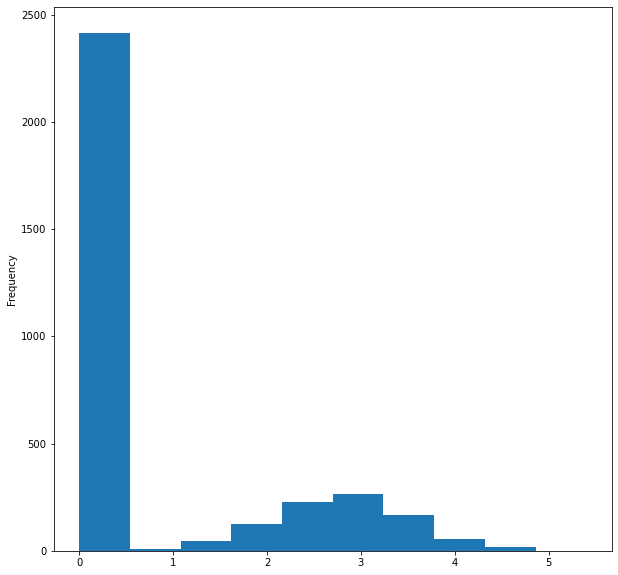

In [234]:
# 얼마나 0 부근에 중복되어 있는지 확인

telco.DataAmount.plot.hist()

In [235]:
# 데이터 사용량 칼럼 속 각 데이터 갯수 확인

telco['DataAmount'].value_counts()

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
0.46       1
4.64       1
0.47       1
1.05       1
4.48       1
Name: DataAmount, Length: 174, dtype: int64

<AxesSubplot:ylabel='Frequency'>

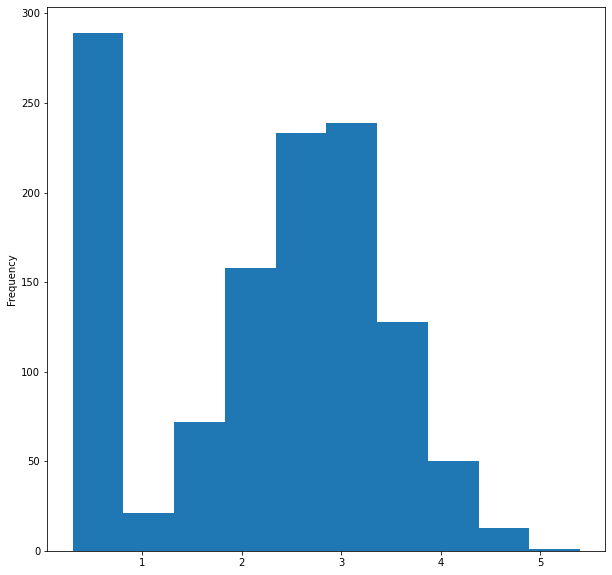

In [236]:
# 데이터 사용량이 0 이하인 경우를 제외하고 다시 비교를 해보겠습니다.

telcos = telco[telco.DataAmount >= 0.3] # 0 이래로 의미있는 데이터를 갖고 있는 0.3부터 가져왔습니다.
                                        # 0.3 이상부터 행이 시작되는 새로운 데이터 사용량 칼럼을
                                        # 새로운 데이터셋 telcos에 적용합니다.
telcos.DataAmount.plot.hist()

0의 심하게 중복되는 현상을 제거한 뒤 다시 확인해보니,

보다 비교하기 쉬운 그래프가 완성되었습니다.

### - 수치형 데이터를 범주형 데이터로 변환 작업

In [237]:
# 데이터 사용량의 수치형 -> 범주형 데이터 변환

bins = [-np.inf, 1, 2, 3, 4, 5, np.inf]  # 구간 나누기
cuts = pd.cut(telcos.DataAmount, bins=bins) # 구간 적용
#.value_counts().sort_index().plot.bar()  # 잘 적용 되었는지 시각화해서 확인
cuts

0        (2.0, 3.0]
1        (3.0, 4.0]
6        (2.0, 3.0]
9        (3.0, 4.0]
11      (-inf, 1.0]
           ...     
3323    (-inf, 1.0]
3326    (-inf, 1.0]
3328     (2.0, 3.0]
3329    (-inf, 1.0]
3332     (3.0, 4.0]
Name: DataAmount, Length: 1204, dtype: category
Categories (6, interval[float64]): [(-inf, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] < (5.0, inf]]

### - 범주화된 데이터 사용량과 월평균 요금의 비교분석
▶  데이터 사용량이 많아질수록 월 평균 요금이 많이 나오는가?

<AxesSubplot:xlabel='DataAmount', ylabel='MonthlyFee'>

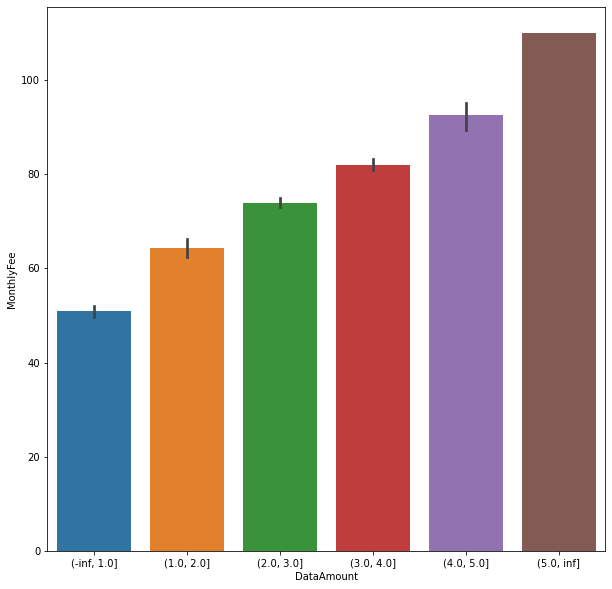

In [238]:
sns.barplot(x=cuts, y= 'MonthlyFee', data = telcos)

결과 : 데이터의 사용량이 많아질수록 월 평균 요금 또한 많이 나오는 모습을 볼 수 있습니다.

상관관계 분석에서 양의 상관관계를 보인 것과 같이 비례적인 관계를 나타내는 것을 확인하였습니다.

# 5. 데이터요금제사용여부에 따른 초과 요금 비교 분석

### - 초과요금의 수치형 ▷ 범주형 데이터 변환

In [239]:
# 초과요금 칼럼 속 각 데이터 갯수 확인

telco['OverFee'].value_counts()

8.50     13
8.09     11
10.19    11
8.36     11
10.05    10
         ..
14.89     1
14.07     1
14.84     1
6.31      1
5.25      1
Name: OverFee, Length: 1024, dtype: int64

In [240]:
# 초과요금 칼럼의 최대/최소 값 및 전반적 정보 확인

telco['OverFee'].describe()

count    3333.000000
mean       10.051488
std         2.535712
min         0.000000
25%         8.330000
50%        10.070000
75%        11.770000
max        18.190000
Name: OverFee, dtype: float64

### - 수치형 데이터를 범주형 데이터로 변환 작업

In [241]:
bins = [-np.inf, 5, 10, 15, np.inf]  # 구간 설정
over_cuts = pd.cut(telcos.OverFee, bins=bins) # 구간 적용
over_cuts

0        (5.0, 10.0]
1        (5.0, 10.0]
6        (15.0, inf]
9       (10.0, 15.0]
11       (5.0, 10.0]
            ...     
3323    (10.0, 15.0]
3326    (10.0, 15.0]
3328    (10.0, 15.0]
3329     (5.0, 10.0]
3332    (10.0, 15.0]
Name: OverFee, Length: 1204, dtype: category
Categories (4, interval[float64]): [(-inf, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, inf]]

### 데이터요금제사용여부에 따른 초과 요금 비교 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

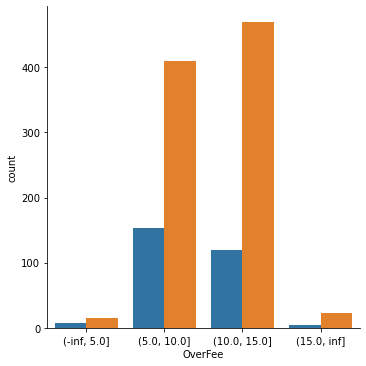

In [242]:
sns.catplot(
     kind='count', x=over_cuts, hue='IsData', data=telcos
)

결과:

데이터 요금제를 사용하면 초과 요금이 훨씬 더 많이 나오는 것을 확인할 수 있습니다.

또, 데이터 요금제를 사용하지 않을 수록 요금이 더 적은 경우가 많고

데이터 요금제를 사용할 수록 요금이 더 많은 경우가 많은 것을 알 수 있습니다.

요금을 절약할 목적이 있다면 데이터 요금제를 쓰지 않는 것이 훨씬 더 많은 절약을 불러올 수 있겠습니다.

# 6. 데이터요금제사용여부에 따라 월 평균 요금의 차이

<AxesSubplot:xlabel='IsData', ylabel='MonthlyFee'>

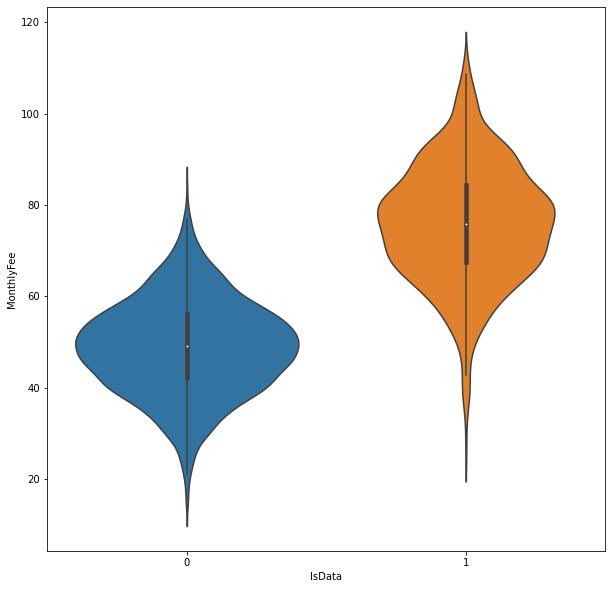

In [243]:
sns.violinplot(x='IsData', y='MonthlyFee', data=telco)

결과 : 데이터 요금제를 쓰지 않으면 월 평균 요금이 더 절약됨을 알 수 있습니다.

# 7. 고객 센터 전화량에 따른 가입 갱신 여부 비교 분석
▶ 고객센터 전화량에 따라 가입 갱신 여부가 어떻게 변하는가?

<AxesSubplot:xlabel='NewContract', ylabel='Callcenter'>

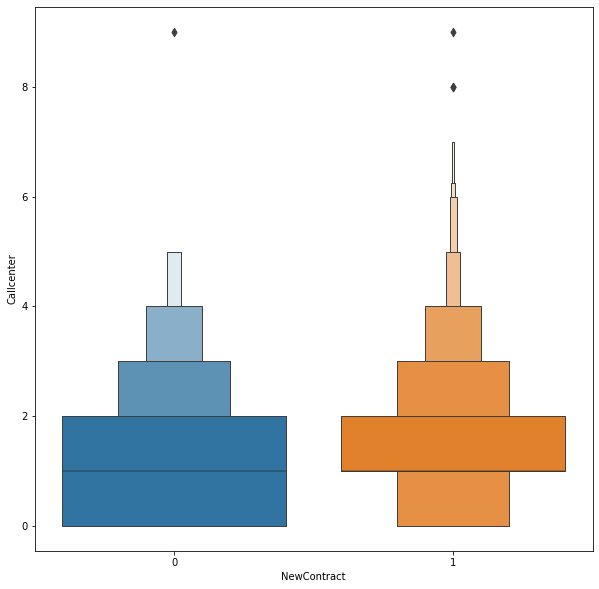

In [244]:
sns.boxenplot(x='NewContract', y='Callcenter', data=telco)

결과:

콜센터 전화량 아예 적은 경우는 비갱신이 많습니다.

갱신/비갱신의 콜센터 전화량의 평균 비율은 같습니다.

전화량이 아주 많으면 갱신 가능성이 보다 높아집니다.

 따라서, 콜센터의 전화량이 최대한 많을수록 갱신 가능성이 높아집니다.

전화량이 거의 없는 경우는 비갱신 가능성이 높아집니다.

콜센터의 전화량이 아주 많거나 아주 적어야 갱신/비갱신의 차이점이 나타납니다.

# 8. 월평균요금에 따른 월평균 전화량과 전화수의 비교 분석

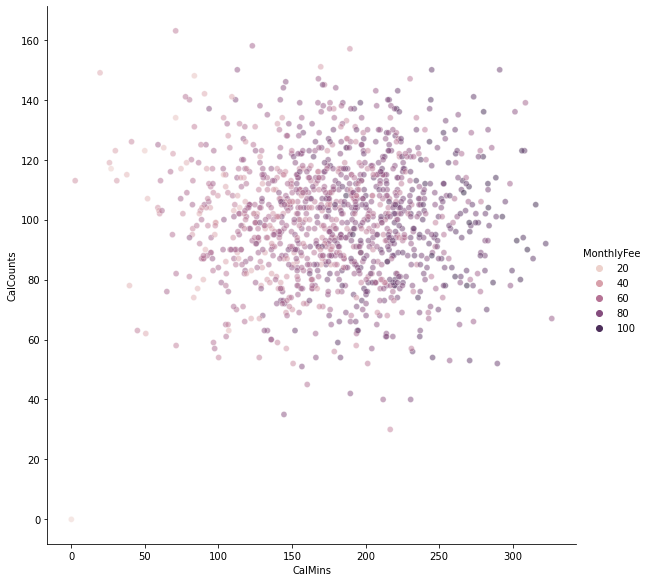

In [245]:
sns.relplot(
     x='CalMins',
     y='CalCounts',
     data=telcos.assign(
     ),
     hue='MonthlyFee', 
     alpha=.5, 
     height=8 
)

결과 : 월평균 요금과, 전화량, 전화수는 구분이 안갈 정도로 거의 모두 비례하다고 볼 수 있겠습니다.

# 9. 데이터 요금제여부에 따른 월평균요금과 데이터사용량 비교

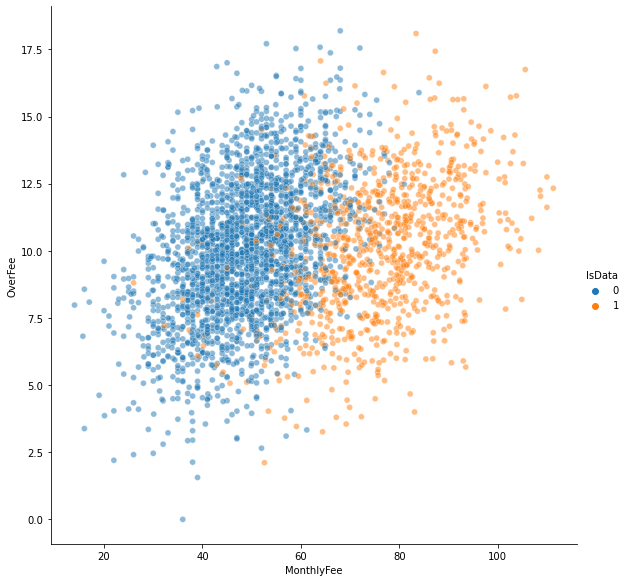

In [246]:
sns.relplot(
     x='MonthlyFee',
     y='OverFee',
     data=telco.assign(
     ),
     hue='IsData', 
     alpha=.5, 
     height=8 
)

결과:

월 평균 요금과 초과요금은 서로 비례관계를 보이고 있다는 결과가 나왔습니다.

데이터 요금제 사용 여부에 따라 사용시 요금이 더 많이 나간다는 사실을 알 수 있습니다.

따라서, 데이터 요금제를 사용할 수록 요금이 더 많이 나오고 평균 요금이 많이 나올 수록 초과 요금도 같이 올라간다는 결론을 내릴 수 있겠습니다.

# 10. 범주형 데이터의 조건 나누기

In [247]:
# 범주형 데이터의 조건을 나누어 조건에 따른 분석을 진행해보겠습니다.

# 가입 갱신한 행만 분류하였습니다.
telco["NewContract"] == 1

0        True
1        True
2        True
3       False
4       False
        ...  
3328     True
3329     True
3330     True
3331    False
3332     True
Name: NewContract, Length: 3333, dtype: bool

In [248]:
# 가입갱신 데이터만을 이용한 분석 시도
# 가입 갱신과 비갱신을 따로 분류하여 데이터 셋을 만들었습니다.

renewal = telco[telco["NewContract"] == 1]  # 가입 갱신한 고객만 들어있는 데이터셋
non_renewal = telco[telco["NewContract"] == 0]  # 가입 비갱신 고객만 들어있는 데이터셋

### - 가입갱신 한 고객 데이터셋을 이용하여 
###   데이터 요금제 사용 여부에 따른 고객센터 전화량 차이 분석

<AxesSubplot:xlabel='IsData', ylabel='Callcenter'>

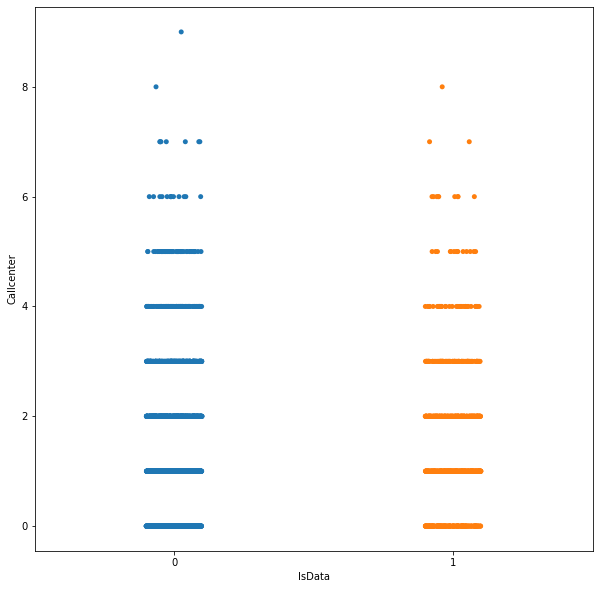

In [249]:
sns.stripplot(x="IsData", y="Callcenter", data=renewal)

결과 : 
    
가입 갱신을 한 고객 중 

데이터 요금제를 사용하지 않는 고객들이 고객센터에 보다 더 전화를 많이 하는 것을 알 수 있습니다.


# 11. 로밍시간과 초과요금의 비교 분석
▶ "해외 로밍으로 통화 오래하면 돈 많이 든다" 의 진실은?!

<AxesSubplot:xlabel='OverFee', ylabel='RoamingMin'>

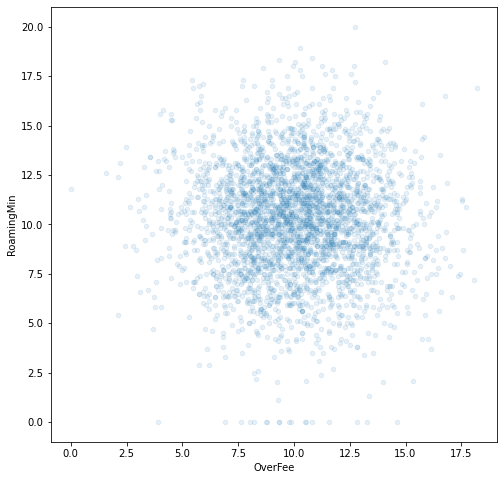

In [250]:
fig, ax = plt.subplots(figsize=(8, 8))
telco.plot.scatter(
 x='OverFee', y='RoamingMin',
 alpha=.1, 
 ax=ax
)

결과:

로밍시간과 초과 요금은 아무런 관계가 없다는 사실을 알 수 있습니다.

따라서 해외 로밍으로 통화를 하는 것이 통신상의 초과 요금을 초래하는 것은 아닌 것으로 밝혀졌습니다.

안심하고 해외에서 통화를 해도 될 것으로 판단 됩니다.

# 12. 분석 결과

이동통신 사용자 데이터 분석을 진행한 결과,

데이터 사용량이 많거나, 요금제 사용시 평균 요금이 향상되며

요금제를 쓰지 않을 시 평균 요금이 절약되는 것을 알 수 있었습니다.

또, 요금제를 사용하지 않는 고객이 궁금한 점이 더 많아 고객 센터와 가까이 지내는 것을 알 수 있었고,

해뢰 로밍 시간과 초과요금은 관련이 없어, 걱정없이 해외에서도 통화를 해도 된다는 것을 알게 되었습니다.

이로써, 데이터 및 요금 절약을 원한다면 데이터 사용량을 줄이거나 요금제 사용을 중단하는 노력이 필요하단 것을 알게 되었고

해외에서 로밍 통화를 아끼는 것은 절약에 도움이 되지 않는 다는 것도 깨달았습니다.

# 13. 느낀점

수치형 데이터를 이용한 데이터 분석의 좋은 경험을 해보았습니다.

수치형 데이터의 범주화 및 비교 분석에 대해 공부할 수 있어 뜻깊은 시간이 되었습니다.

1학기 동안 배울 점이 가득한 강의에 큰 감사를 전해드리고 싶습니다.

앞으로 대내외 적으로 다양한 프로젝트를 통해 교수님께서 지도해주신 방향대로 더욱 분석 능력을 길러 저의 꿈을 이루고자 합니다.

다음 강의에서 또 뵙겠습니다. 존경하는 교수님 감사합니다.